# BatFlightAnalysis

## Paquetes

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import scipy.stats as stats

from BatFlightAnalysis import read_data, split_data

## Funciones

In [2]:
def curvatura(df):
    # Convertir a arrays de numpy
    x = np.array(df['x'])
    y = np.array(df['y'])
    z = np.array(df['z'])

    # Calcular las derivadas usando diferencias finitas
    dx = np.gradient(x)
    dy = np.gradient(y)
    dz = np.gradient(z)

    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    ddz = np.gradient(dz)

    # Calcular la curvatura
    curvatura = np.zeros(len(x))

    for i in range(len(x)):
        # Vectores de la primera y segunda derivada
        r_prime = np.array([dx[i], dy[i], dz[i]])
        r_double_prime = np.array([ddx[i], ddy[i], ddz[i]])
        
        # Producto cruzado de r' y r''
        cross_product = np.cross(r_prime, r_double_prime)
        
        # Magnitud de r'
        norm_r_prime = np.linalg.norm(r_prime)
        
        # Curvatura
        curvatura[i] = np.linalg.norm(cross_product) / (norm_r_prime**3)

    # Desviación Estándar de la curvatura
    std_curvatura = np.std(curvatura)

    # Media de la curvatura
    mean_curvatura = np.mean(curvatura)

    return mean_curvatura, std_curvatura

In [3]:
def longitud(df):
    # Convertir a arrays de numpy
    x = np.array(df['x'])
    y = np.array(df['y'])
    z = np.array(df['z'])

    # Longitud de la trayectoria
    longitud = np.zeros(len(x))

    for i in range(1, len(x)):
        longitud[i] = longitud[i-1] + np.sqrt((x[i] - x[i-1])**2 + (y[i] - y[i-1])**2 + (z[i] - z[i-1])**2)

    # Longitud total
    longitud_total = longitud[-1]

    return longitud_total

In [4]:
def var_espacial(df):
    # Convertir a arrays de numpy
    x = np.array(df['x'])
    y = np.array(df['y'])
    z = np.array(df['z'])

    longitud_x = np.max(x) - np.min(x)
    longitud_y = np.max(y) - np.min(y)
    longitud_z = np.max(z) - np.min(z)

    volumen = longitud_x * longitud_y * longitud_z

    return longitud_x, longitud_y, longitud_z, volumen


In [14]:
def normal_plots(whiskers_data, no_whiskers_data, metric):
    print(f"Normality test for {metric}:")
    # Perform normality check for "whiskers" and "no whiskers" groups and plot histograms and Q-Q plots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Histogram and Q-Q plot for 'whiskers'
    axes[0, 0].hist(whiskers_data[metric], bins=15, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title(f'Histogram of {metric} (Whiskers)')
    axes[0, 1].set_title(f'Q-Q Plot of {metric} (Whiskers)')
    stats.probplot(whiskers_data[metric], dist="norm", plot=axes[0, 1])

    # Histogram and Q-Q plot for 'no whiskers'
    axes[1, 0].hist(no_whiskers_data[metric], bins=15, edgecolor='black', alpha=0.7)
    axes[1, 0].set_title(f'Histogram of {metric} (No Whiskers)')
    axes[1, 1].set_title(f'Q-Q Plot of {metric} (No Whiskers)')
    stats.probplot(no_whiskers_data[metric], dist="norm", plot=axes[1, 1])

    plt.tight_layout()
    plt.show()

## Código

### Lectura de datos

In [5]:
data_bef, data_fee, data_aft = read_data('data/output_points_1_no_whiskers.xlsx')

In [6]:
# Split data into flower and bat data; before, during, and after feeding
flower_bef, flower_fee, flower_aft, bat_bef, bat_fee, bat_aft = split_data(data_bef, data_fee, data_aft)

# Show the data
print(flower_fee.head())

      x    y      z
9   281   94  349.0
10  283   98  345.0
11  283  100  341.0
12  283  103  338.0
13  288  103  336.0


### Curvatura

In [7]:
mean_curvatura, std_curvatura = curvatura(flower_fee)
print('Desviación Estándar de la Curvatura:', std_curvatura)
print('Media de la Curvatura:', mean_curvatura)

Desviación Estándar de la Curvatura: 1.8368621915524173
Media de la Curvatura: 0.5475373323457154


### Longitud

In [8]:
# Longitud total
longitud_total = longitud(flower_fee)
print('Longitud Total:', longitud_total)

Longitud Total: 375.82886152263075


### Variación en cada eje

In [9]:
# Variación en cada eje
longitud_x, longitud_y, longitud_z, volumen = var_espacial(flower_fee)

print('Longitud de la trayectoria en el eje x:', longitud_x)
print('Longitud de la trayectoria en el eje y:', longitud_y)
print('Longitud de la trayectoria en el eje z:', longitud_z)
print('Volumen del Espacio:', volumen)

Longitud de la trayectoria en el eje x: 14
Longitud de la trayectoria en el eje y: 15
Longitud de la trayectoria en el eje z: 17.0
Volumen del Espacio: 3570.0


## Iteración sobre archivos

In [10]:
individuo, whiskers, n_vuelo = [], [], []
mean_curvatura, std_curvatura = [], []
longitud_total = []
longitud_x, longitud_y, longitud_z, volumen = [], [], [], []

for n in range(6,10):
    # for tipo in ["Whiskers"]:
    for tipo in ["Whiskers", "No whiskers"]:
        # Recorro lo archivos de la capeta Individuo n
        for file in os.listdir(f'data/Individuo {n}/{tipo}'):
            # print("Procesando:", f"Individuo {n}/{tipo}/{file}")

            try:
                data_bef, data_fee, data_aft = read_data(f'data/Individuo {n}/{tipo}/{file}')

                # Split data into flower and bat data; before, during, and after feeding
                flower_bef, flower_fee, flower_aft, bat_bef, bat_fee, bat_aft = split_data(data_bef, data_fee, data_aft)

                # Curvatura
                mean_curv, std_curv = curvatura(flower_fee)
                mean_curvatura.append(mean_curv)
                std_curvatura.append(std_curv)

                # Longitud total
                long = longitud(flower_fee)
                longitud_total.append(long)

                # Variación en cada eje
                long_x, long_y, long_z, vol = var_espacial(flower_fee)
                longitud_x.append(long_x)
                longitud_y.append(long_y)
                longitud_z.append(long_z)
                volumen.append(vol)

                individuo.append(n)
                whiskers.append(tipo)
                n_vuelo.append(file.split('_')[-1].split('.')[0])
            except:
                print("Error en el archivo:", f"Individuo {n}/{tipo}/{file}")

# Creo el conjunto de datos
df = pd.DataFrame({
    'Individuo': individuo,
    'Tipo': whiskers,
    'No. Vuelo': n_vuelo,
    'Curvatura Media': mean_curvatura,
    'Desviación Estándar de la Curvatura': std_curvatura,
    'Longitud Total': longitud_total,
    'Longitud en X': longitud_x,
    'Longitud en Y': longitud_y,
    'Longitud en Z': longitud_z,
    'Volumen': volumen
})

# Muestro los datos
display(df.head())

Error en el archivo: Individuo 6/No whiskers/output_points_7.xlsx


C:\Users\matea\AppData\Local\Temp/ipykernel_13916/4145792484.py:31: RuntimeWarning: invalid value encountered in double_scalars
  curvatura[i] = np.linalg.norm(cross_product) / (norm_r_prime**3)


,Individuo,Tipo,No. Vuelo,Curvatura Media,Desviación Estándar de la Curvatura,Longitud Total,Longitud en X,Longitud en Y,Longitud en Z,Volumen
0,6,Whiskers,1,0.319137,0.309382,75.694841,18.0,14.0,19.0,4788.0
1,6,Whiskers,10,0.061655,0.072966,260.010676,54.0,40.0,125.0,270000.0
2,6,Whiskers,11,1.097282,3.454947,80.997540,7.0,21.0,18.0,2646.0
3,6,Whiskers,12,0.128108,0.231968,131.251894,21.0,40.0,93.0,78120.0
4,6,Whiskers,13,0.255117,0.302641,58.087628,10.0,11.0,16.0,1760.0


In [11]:
# Guardo los datos
df.to_excel('data/mediciones.xlsx', index=False)

## Análisis comparativo

In [12]:
# Leo el archivo de datos
data = pd.read_excel('data/mediciones.xlsx')

display(data.head())

,Individuo,Tipo,No. Vuelo,Curvatura Media,Desviación Estándar de la Curvatura,Longitud Total,Longitud en X,Longitud en Y,Longitud en Z,Volumen
0,6,Whiskers,1,0.319137,0.309382,75.694841,18,14,19.0,4788.0
1,6,Whiskers,10,0.061655,0.072966,260.010676,54,40,125.0,270000.0
2,6,Whiskers,11,1.097282,3.454947,80.997540,7,21,18.0,2646.0
3,6,Whiskers,12,0.128108,0.231968,131.251894,21,40,93.0,78120.0
4,6,Whiskers,13,0.255117,0.302641,58.087628,10,11,16.0,1760.0


Normality test for Curvatura Media:


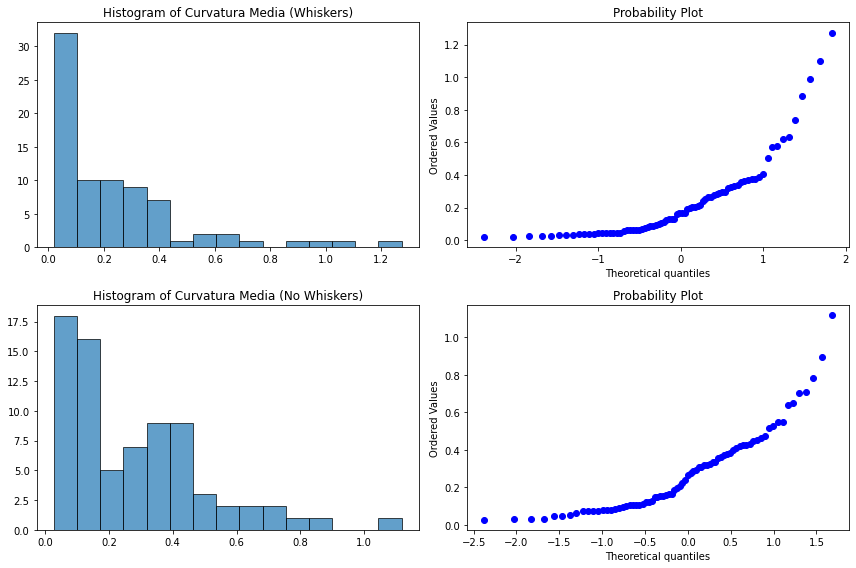

Normality test for Desviación Estándar de la Curvatura:


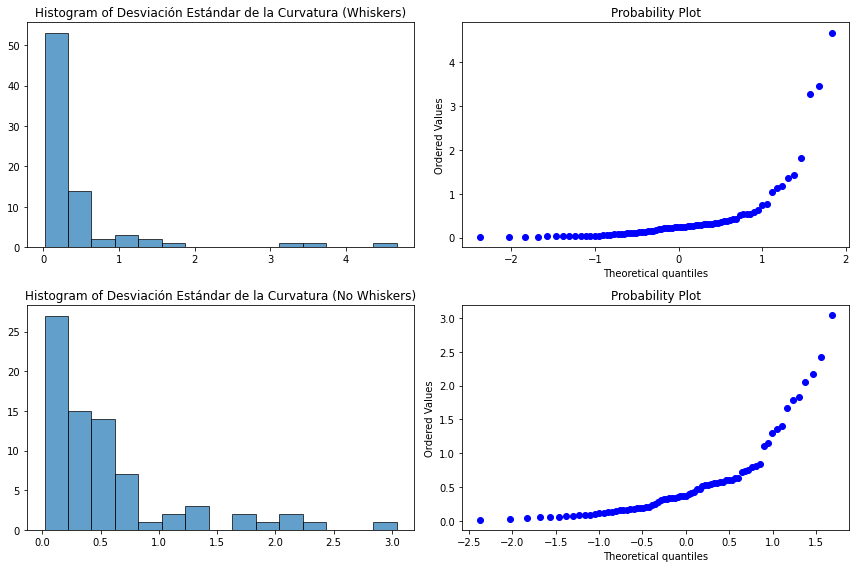

Normality test for Longitud Total:


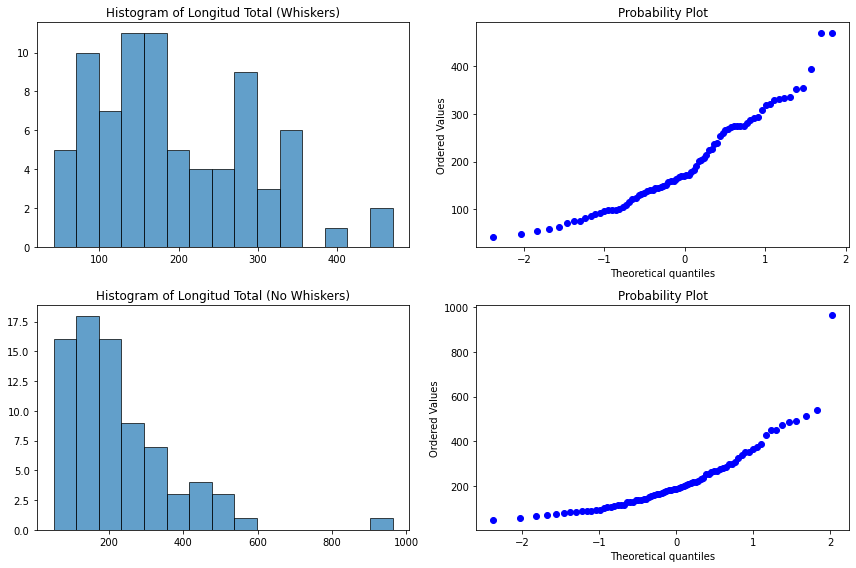

Normality test for Longitud en X:


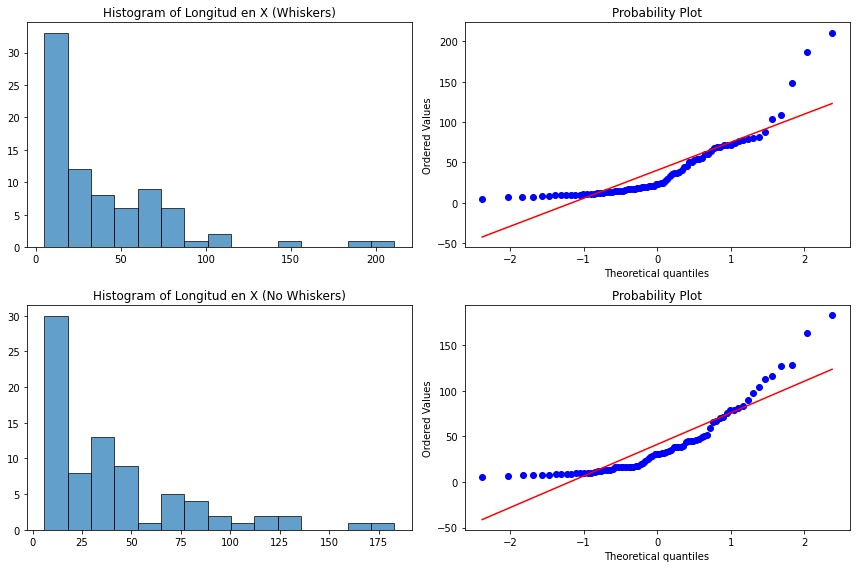

Normality test for Longitud en Y:


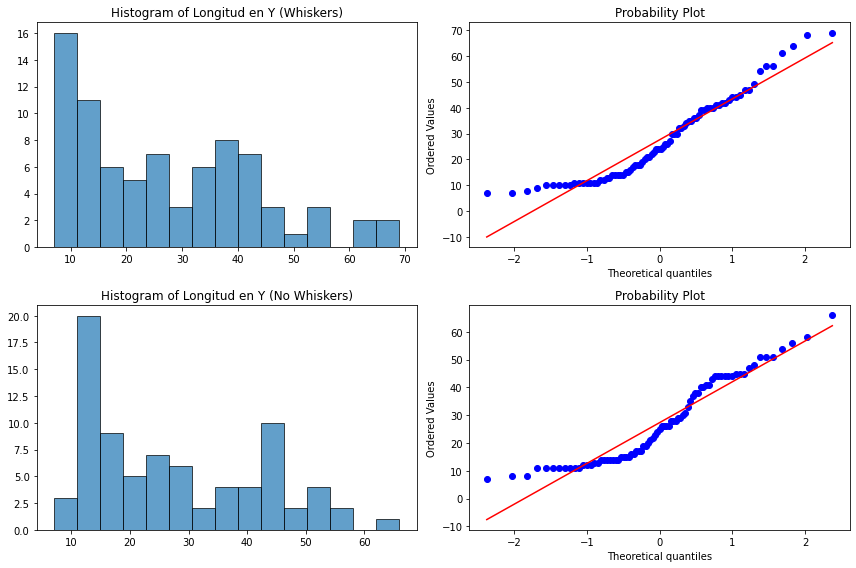

Normality test for Longitud en Z:


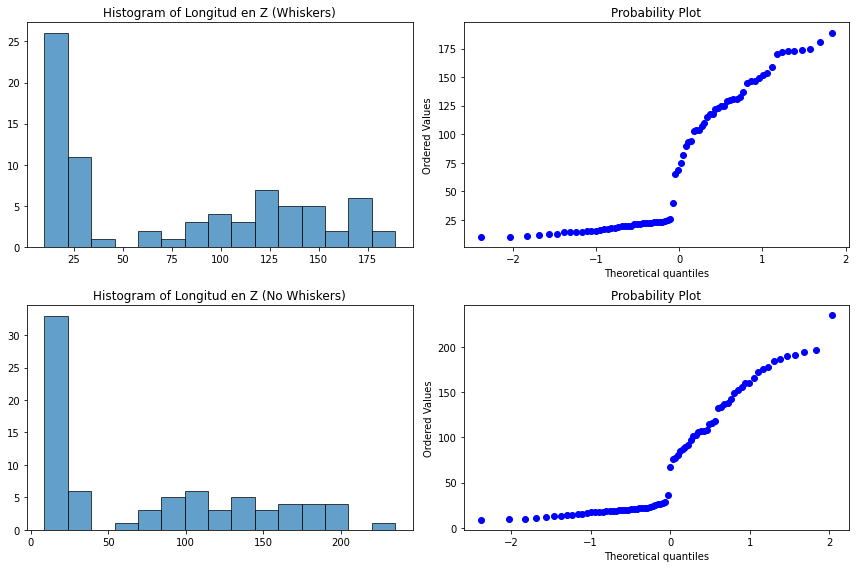

Normality test for Volumen:


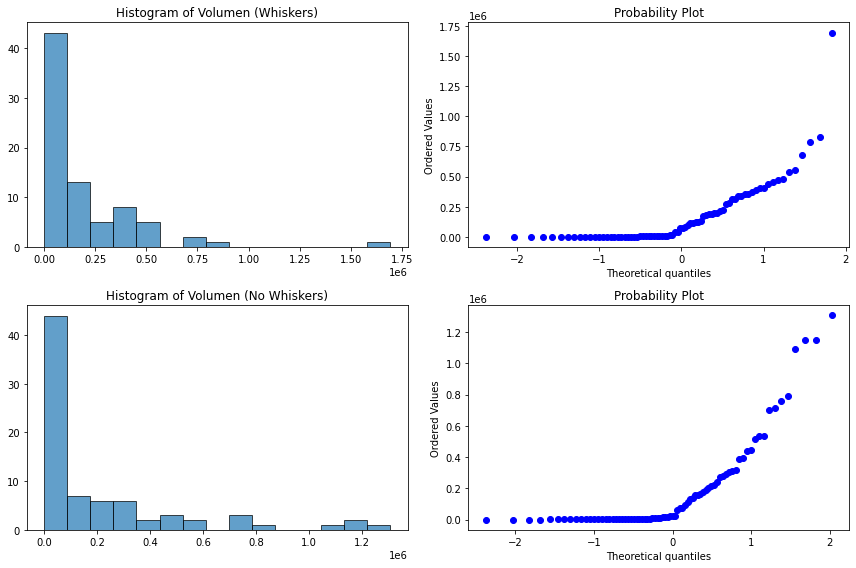

In [15]:
# Separate data based on "Tipo" (whiskers or no whiskers)
whiskers_data = data[data['Tipo'] == 'Whiskers']
no_whiskers_data = data[data['Tipo'] == 'No whiskers']

for metric in ['Curvatura Media', 'Desviación Estándar de la Curvatura', 'Longitud Total', 'Longitud en X', 'Longitud en Y', 'Longitud en Z', 'Volumen']:
    normal_plots(whiskers_data, no_whiskers_data, metric)